# Abalone Rings Prediction

<img src = 'https://crystal-shop.co/wp-content/uploads/2022/10/abalone-meaning-abalone-shell-fossil-rock-spiritual-meaning-mineral-crystal-stone-abalone.jpg' />

This is a KAGGLE competition from Playground Series! The goal of this competition is to predict the age of abalone from various physical measurements.

The evaluation metric for this competition is **Root Mean Squared Logarithmic Error**.

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Abalone dataset. Feature distributions are close to, but not exactly the same, as the original. The dataset is already split in train and test. Train will be used to create and train the model and test will be used to make the predictions and submit.

---

The competition can be found on this link: https://www.kaggle.com/competitions/playground-series-s4e4/overview

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.preprocessing import StandardScaler

## Reading the Data

In [2]:
# Getting the file name and path

file = zipfile.ZipFile('../Data/playground-series-s4e4.zip')

In [3]:
# Printing the filelist
for i in file.filelist:
    print(i.filename)

sample_submission.csv
test.csv
train.csv


In [4]:
# Openning the zip file and reading the provided csv file from KAGGLE

with file.open('train.csv') as train:
    df_train = pd.read_csv(train)
    
with file.open('test.csv') as test:
    df_test = pd.read_csv(test)

In [5]:
# Showing the dataframes shapes

df_train.shape, df_test.shape

((90615, 10), (60411, 9))

We have around 90k cases that we will use to create and train the model with. We have around 60k cases to make the prediction for the submition.

In [6]:
# Showing top rows of the train df

df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [7]:
# Getting the df_train column names

names = df_train.columns

Before continuing with analyzing the data and creating the models, lets explain the features of this dataset:

- <code>id</code>: It is the id of each abalone. It will not be used as a feature
- <code>Sex</code>: It is a categorical feature representing the sex of the abalonede
- <code>Length</code>: Its a continuous feature which shows the longest measurement of the shell measurement in mm
- <code>Diameter</code>: It is a continuous feature which measures the perpendicular to length in mm
- <code>Height</code>: It is a continuous variable which shows the height with meat of the shell in mm
- <code>Whole weight</code>: It is a continuous variable which shows the whole abalone weight in grams
- <code>Whole weight.1</code>: It is a continuous variable which shows the weight of the meat of abalone in grams
- <code>Whole weight.2</code>: It is a continuous variable which shows the gut weight (after bleeding) of abalone in grams
- <code>Shell weight</code>: It is a continuous variable which shows the weight of abalone after being dried in grams
- <code>Rings</code>: Which is our target its a continuous variable (+1.5 of the ring gives the age in years)

## Data wrangling

In [8]:
# Checking the null values of the train df

df_train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
# Checking the null values of the test df

df_test.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64

There are no null values in the train and test data sets

In [10]:
# Checking duplicates in the train df

df_train.loc[df_train.duplicated()]

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings


In [11]:
# Checking duplicates in the test df

df_test.loc[df_test.duplicated()]

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight


There are no duplicates in the train and test data sets

In [12]:
# Checking whether we have all columns in the train set as well as in the test set

# Defining the target column
features = [i for i in df_train.columns if i != 'Rings']

# Defining test columns
test_columns = set(df_test.columns)

# Checking if features is a subset test set
features_in_test = set(features).issubset(test_columns)

# Print the results
print("All train features are in test set:", features_in_test)

All train features are in test set: True


In [13]:
# Combining the two dataframes (train and test)

total_df = pd.concat([df_train, df_test])
total_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11.0
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11.0
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6.0
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10.0
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9.0


In [14]:
# Dropping the 'id' column from the total df ('id' will not be used to train the model)

total_df.drop('id', axis=1, inplace=True)

In [15]:
# Checking the null values of the total df

total_df.isnull().sum()

Sex                   0
Length                0
Diameter              0
Height                0
Whole weight          0
Whole weight.1        0
Whole weight.2        0
Shell weight          0
Rings             60411
dtype: int64

The null values of this new total df are the values from the target column of test set

## Exploratory Data Analysis (EDA)

In [16]:
# Dropping the 'id' column from the train df

df_train.drop('id', axis = 1, inplace=True)

In [17]:
df_train.shape

(90615, 9)

In [18]:
df_train.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,33093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,NaN,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,NaN,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000


Based on the descriptive statistics from the train data it can be inferred that:

Sex is a categorical variable with three unique values. The most frequent category is ‘I’ - Infant, which appears 33093 times out of a total count of 90615 entries.
Other variables are numerical variables and will be analysed in the following.

In [19]:
# Setting darkgrid for better visualization

sns.set_style('darkgrid')

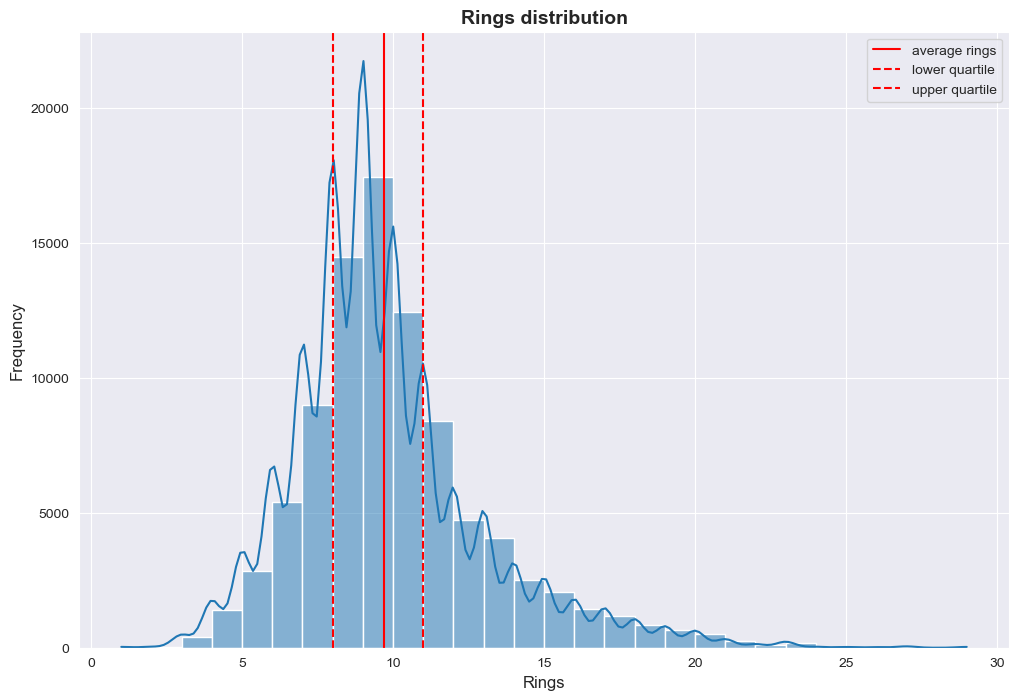

In [20]:
# Plotting a histogram of the target feature

fig, axs = plt.subplots(figsize=(12,8))

# calculating the mean value of rings
mean_rings = df_train['Rings'].mean()

# Calculating the lower and upper quartiles
lq_rings = np.percentile(df_train['Rings'], 25)
uq_rings = np.percentile(df_train['Rings'], 75)

sns.histplot(data=df_train, x='Rings', bins=28, kde=True)

plt.title('Rings distribution', fontsize = 14, fontweight='bold')
plt.xlabel('Rings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Ploting the mean, lq and uq lines in hist chart
plt.axvline(x=mean_rings, color='red', label='average rings')
plt.axvline(x=lq_rings, color='red', linestyle='--', label='lower quartile')
plt.axvline(x=uq_rings, color='red', linestyle='--', label='upper quartile')
plt.legend()

plt.show()

From the chart above it can be inferred that most of the 'abalones' are clustered around 5 to 15 rings, with a notable peak around 10 rings. This suggests that most of the organisms are around 10 years old, if we assume that the number of rings represents age. The blue shaded area and line represent the frequency of each ring count. The distribution appears to be right-skewed, meaning there are a few instances of higher ring counts

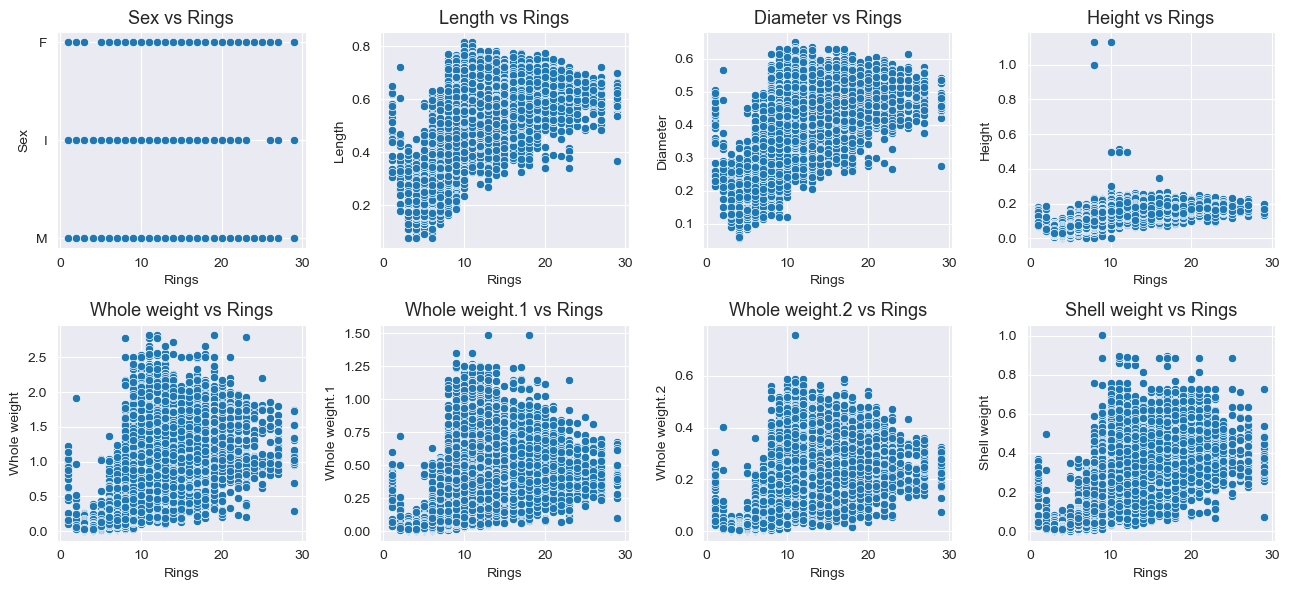

In [21]:
# Plotting a scatterplot of columns vs target

fig, axs = plt.subplots(2, 4, figsize=(13, 6)) 
axs = axs.ravel()  # Flatten the array of axes

# Defineing the target column
target = 'Rings'

# Defineing the feature columns
cols = [col for col in df_train.columns if col != target]  # List of columns excluding the target

for i in range(8):  
    sns.scatterplot(data=df_train, x=target, y=cols[i], ax=axs[i])  # Plot on the i-th subplot
    axs[i].set_title(str(cols[i]) + ' vs ' + str(target), fontsize=13)

plt.tight_layout()

From the chart above we understand that in general, the physical attributes (length, diameter, height, and weight measurements) of the samples have a positive correlation with the number of rings. 

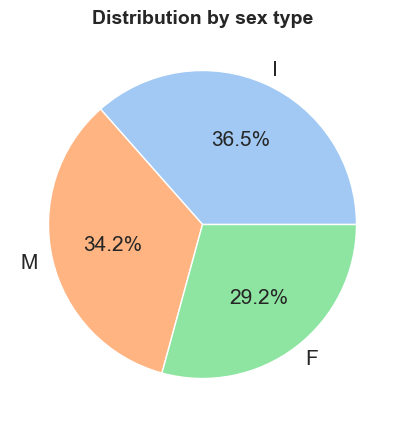

In [22]:
# Calculating the number of samples per each sex type
values_by_sex = df_train['Sex'].value_counts()

# Defining custom colors for the pie chart
custom_colors = sns.color_palette("pastel")

# Increasing the overall fontsize of the plot
plt.rc('font', size=15)

# Creating a pie chart with customizations
values_by_sex.plot(kind='pie',labels=values_by_sex.index, colors=custom_colors, autopct='%1.1f%%', figsize=(5, 5))

# Adding the title
plt.title('Distribution by sex type', fontsize=14, fontweight='bold')
plt.ylabel('')

# Displaying the pie chart
plt.show()

Almost, all the data is equally spread for each sex type. 'I' - Infant cases are slightly more abudant than others with 36.5% of all cases, followed by 'M' - Male and then 'F' - Female

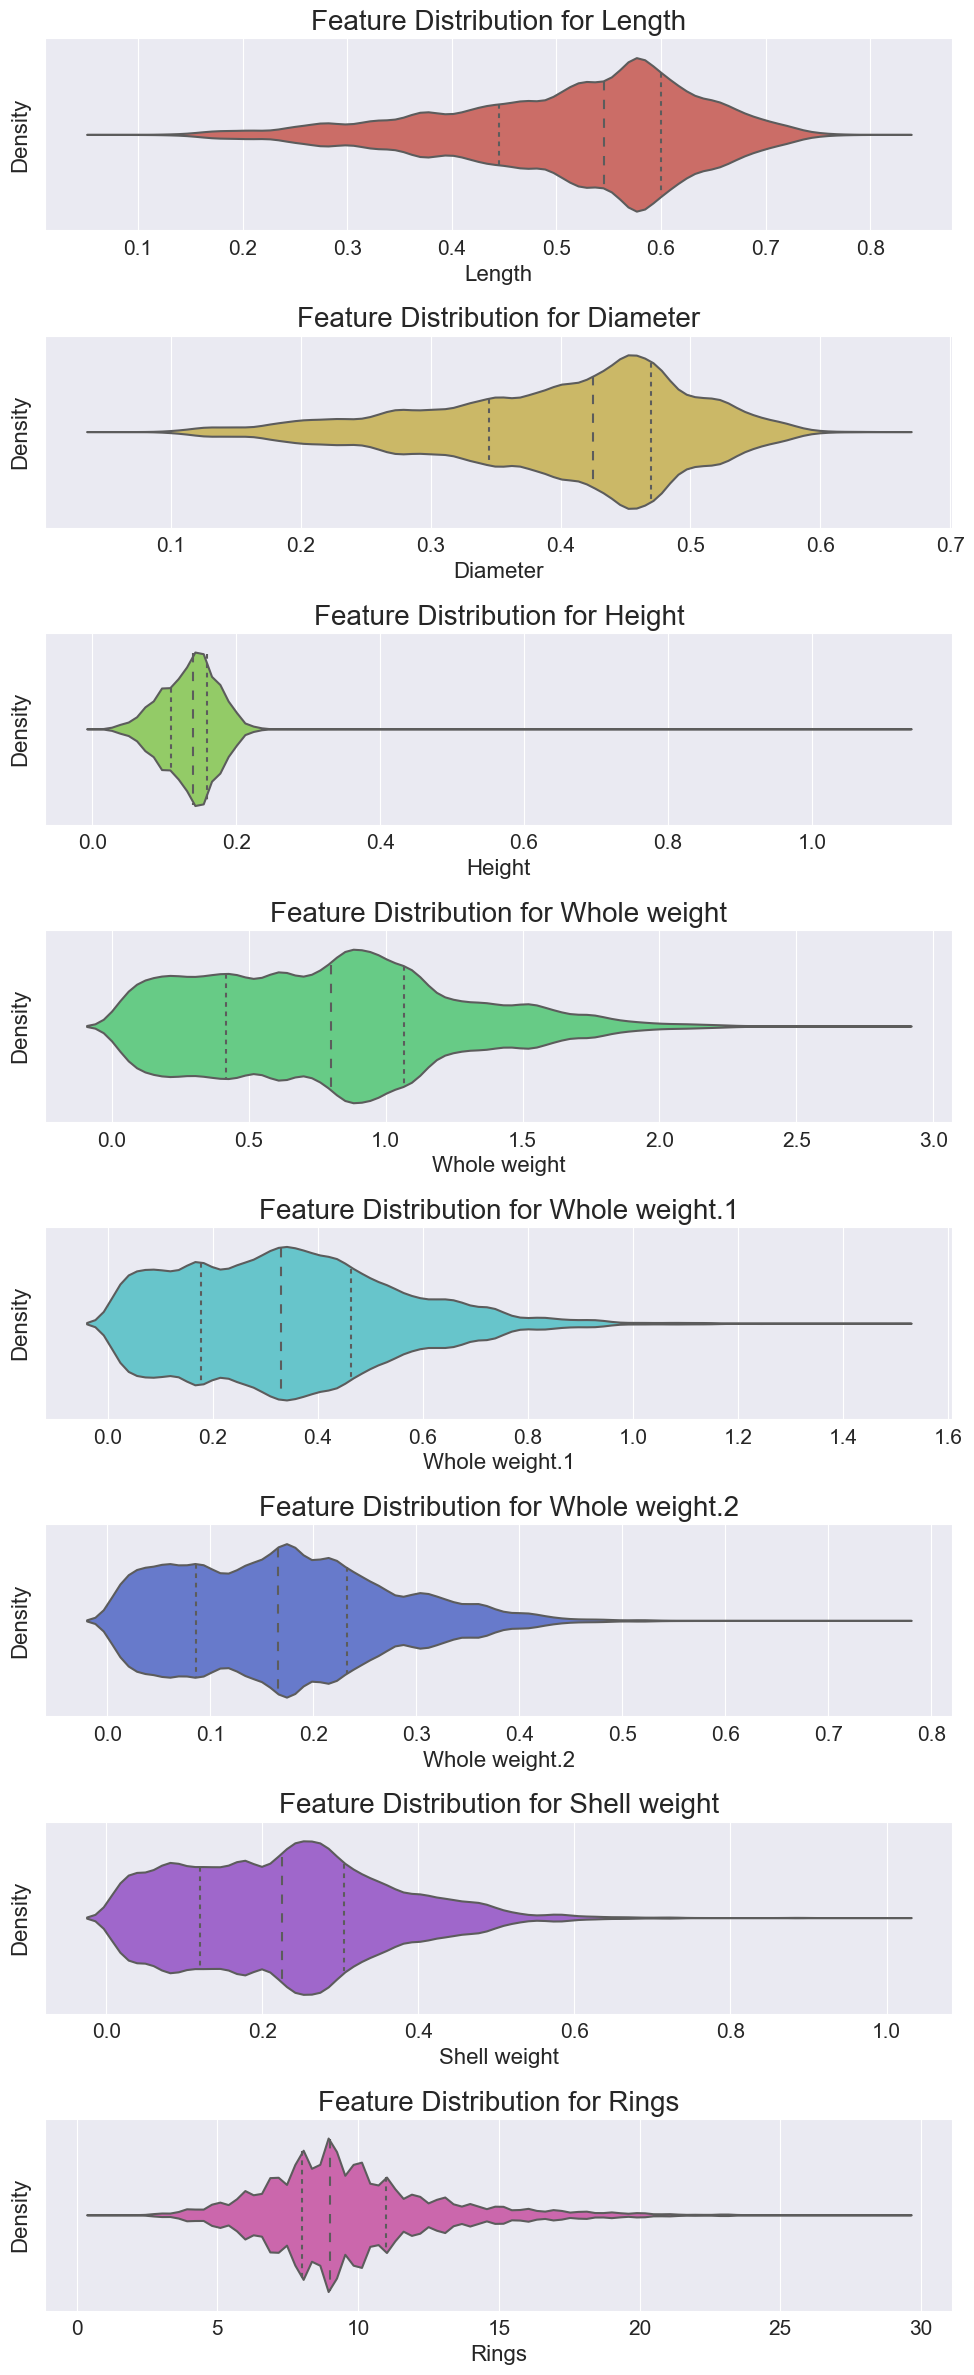

In [23]:
# Plotting a violin plot to show the spread of the values for each numerical feature

sns.set_style("darkgrid")
palette = sns.color_palette("hls", len([i for i in df_train.columns if i != 'Sex']))
fig, axs = plt.subplots(len([i for i in df_train.columns if i != 'Sex']), figsize=(10, len([i for i in df_train.columns if i != 'Sex'])*3))

for i, col in enumerate([i for i in df_train.columns if i != 'Sex']):
    sns.violinplot(x=df_train[col], ax=axs[i], inner="quartile", palette=[palette[i]])
    axs[i].set_title('Feature Distribution for ' + col, fontsize=20)
    axs[i].set_xlabel(col, fontsize=16)  
    axs[i].set_ylabel('Density', fontsize=16) 
plt.tight_layout()
plt.show()

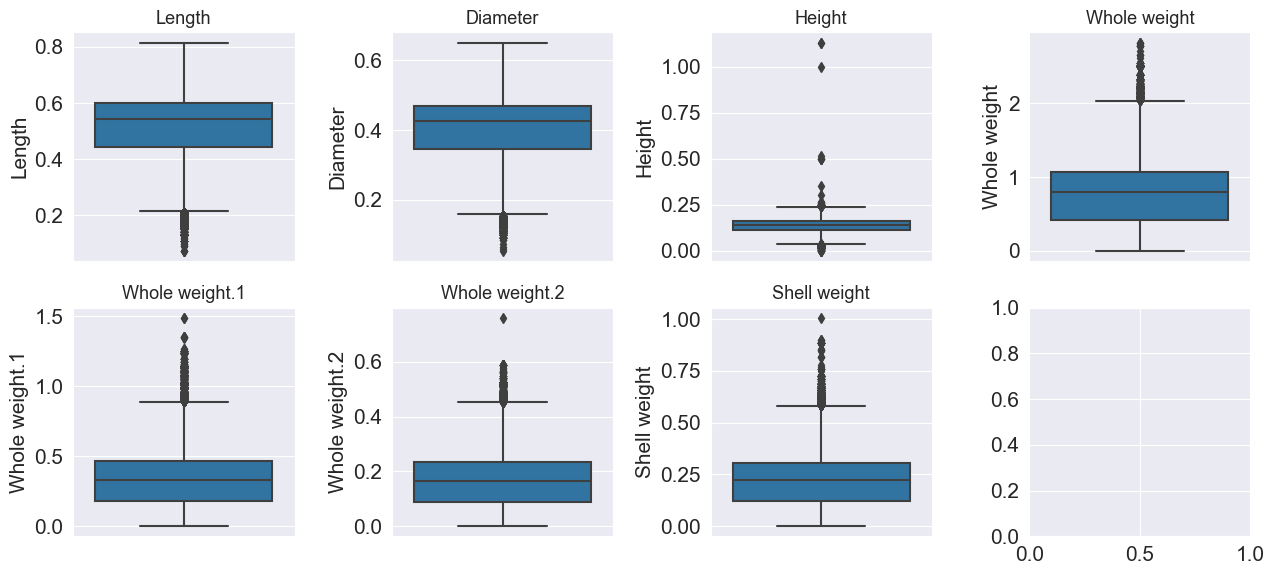

In [24]:
# Plotting boxplots of numerical columns

fig, axs = plt.subplots(2, 4, figsize=(13, 6)) 
axs = axs.ravel()  # Flatten the array of axes

# Defineing the feature columns
cols2 = [i for i in cols if i != 'Sex'] 

for i in range(7):  
    sns.boxplot(data = df_train, y=cols2[i], ax=axs[i])  # Plot on the i-th subplot
    axs[i].set_title(cols2[i], fontsize=13)

plt.tight_layout()
plt.show()

From the boxplots above we understand that:

- Length: The data seems to be fairly symmetric with a median close to 0.5. There are a few outliers, indicating some abnormally small langths.
- Diameter: Similar to length, the data is fairly symmetric with a median around 0.5. There are outliers but fewer than in the length column.
- Height: The median height is lower than for length and diameter, around 0.15. There are quite a few outliers on the higher end, indicating some abalones with unusually high values for height.
- Whole Weight 1: The data is skewed towards the lower end, with a median around 0.8. There are several outliers on the higher end, suggesting some abalones with exceptionally high whole weights.
- Whole Weight 2: The distribution is similar to Whole Weight 1, but the outliers are even more extreme.
- Shell Weight: The median shell weight is around 0.2, and the data is skewed towards the lower end. There are several outliers on the higher end.

In this notebook the outlier values were not removed, because these points may be cruitial to predict the age of the abalones with high accuracy!

### Feature Engineering

In [25]:
def feature_add(df):
#     df['Area'] = df['Length'] * df['Diameter']
#     df['Volume'] = df['Length'] * df['Height'] * df['Diameter'] 
    
#     df["Shell weight"]=np.log(0.00001+df["Shell weight"])
#     df["Whole weight"]=np.log(0.00001+df["Whole weight"])
#     df["Whole weight.1"]=np.log(0.00001+df["Whole weight.1"])
#     df["Whole weight.2"]=np.log(0.00001+df["Whole weight.2"])
    
#     df['Dens'] = df['Whole weight'] / df['Diameter']
    
    df["Whole weight Ratio"]=df["Whole weight.1"]/df["Whole weight"]
    
    return df

In [26]:
# Adding the created features to the total df

total_df = feature_add(total_df)
total_df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Whole weight Ratio
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11.0,0.425794
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11.0,0.405310
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6.0,0.261905
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10.0,0.410607
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9.0,0.472506


In [27]:
# One-hot-encoding the categorical feature

#columns_to_dummify = ['Sex']

#total_df = pd.get_dummies(total_df, columns=columns_to_dummify)

In [28]:
# Labeling the categorical feature

total_df['Sex'] = pd.factorize(total_df['Sex'])[0]

## Training the models


### Splitting the data into train and test sets

In [30]:
# Spliting train and test df after processing

# Train df
train_df = total_df.loc[total_df['Rings'].isna() == False].copy()

# Test df
test_df = total_df.loc[total_df['Rings'].isna() == True].dropna(axis=1).copy()

train_df.shape, test_df.shape

((90615, 10), (60411, 9))

### Ploting the heatmap of pearsons correlation

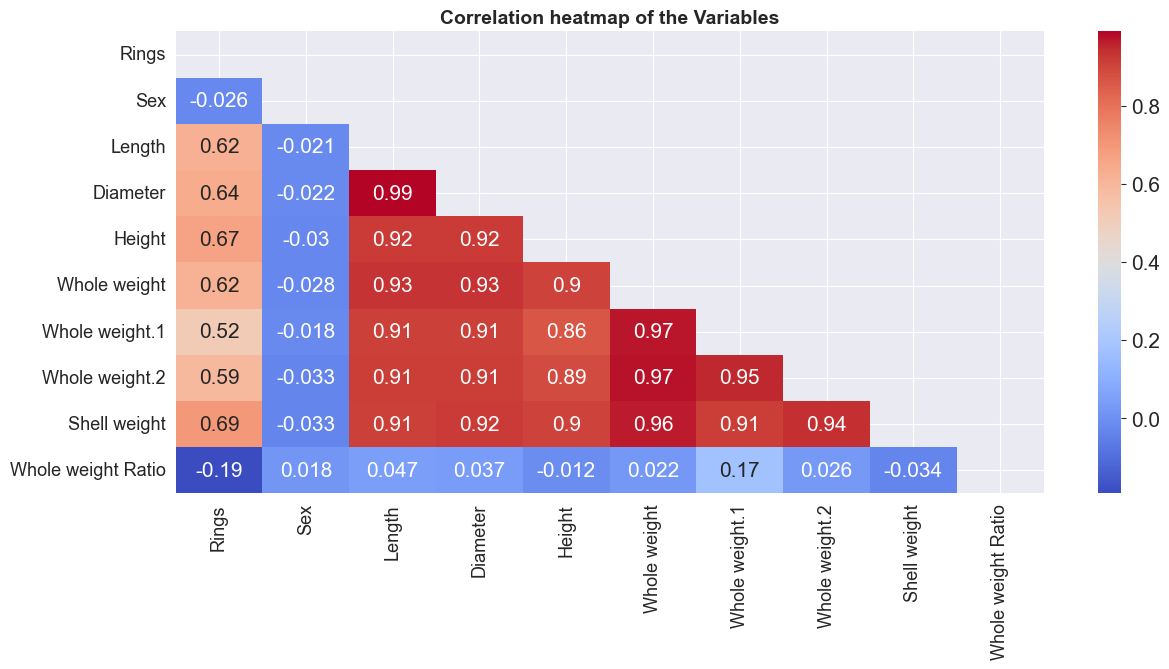

In [32]:
# Plotting the heatmap of pearsons correlations between features

fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(data=train_df[['Rings'] + [i for i in train_df.columns if i != 'Rings']].corr(), 
            
        annot=True, 
            
        mask = np.triu(np.ones_like(train_df[['Rings'] + [i for i in train_df.columns if i != 'Rings']].corr(), dtype=bool)),
           cmap='coolwarm')

plt.title('Correlation heatmap of the Variables', fontsize=14, fontweight = 'bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### Definineing independed and target columns

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Independed variables (Features)
X = train_df.drop('Rings', axis = 1)

# Depended variables (Targets)
y = train_df['Rings']

In this notebook, we utilize two techniques: StratifiedKFold and TransformedTargetRegressor.

* StratifiedKFold: This technique is employed when splitting the dataset into folds for cross-validation in regression tasks. It ensures that the distribution of the target variable across folds remains representative of the overall dataset. This is particularly useful when the target variable has uneven distributions or outliers, helping to prevent biased evaluation metrics.

* TransformedTargetRegressor: We utilize this technique when dealing with regression tasks where the target variable's distribution is not normal or exhibits nonlinear relationships with the features. TransformedTargetRegressor allows us to apply transformations to the target variable, such as logarithmic or exponential transformations, before fitting the regression model. By transforming the target variable, we aim to improve the model's predictive performance by making its distribution more suitable for the chosen regression algorithm.

In [35]:
from sklearn.model_selection import KFold, StratifiedKFold 
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer

#### LightGBM Model

In [37]:
import lightgbm

In [38]:
from sklearn.metrics import mean_squared_log_error
from lightgbm import LGBMRegressor
from math import sqrt
import optuna

The below cell is used to find the best parameters using OPTUNA optimizer (uncomment it and run it to get results)

In [39]:
# import optuna
# from sklearn.metrics import make_scorer

# def objective(trial):
#     # Define hyperparameters to tune
#     params = {
#         "objective": "regression",
#         "verbosity": -1,
#         "boosting_type": "gbdt",
#         "random_state": 42,
        
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.04),
#         "n_estimators": trial.suggest_int("n_estimators", 600, 1600),
#         "lambda_l1": trial.suggest_float("lambda_l1", 0.001, 0.09),
#         "lambda_l2": trial.suggest_float("lambda_l2", 0.1, 2.0),
#         "max_depth": trial.suggest_int("max_depth", 7, 25),
#         "num_leaves": trial.suggest_int("num_leaves", 35, 140),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 0.95),
#         "subsample": trial.suggest_float("subsample", 0.0025, 0.1),
#         "min_child_samples": trial.suggest_int("min_child_samples", 25, 95),
        
#         'feature_fraction': trial.suggest_float("feature_fraction", 0.4, 0.7),
#         'bagging_fraction': trial.suggest_float("bagging_fraction", 0.7, 1.0),
#         'bagging_freq': trial.suggest_int("bagging_freq", 2, 10),
#         'min_data_in_leaf': trial.suggest_int("min_data_in_leaf", 20, 40)
#         #"early_stopping_rounds":50
#     }
    
#     # Define base regressor with Optuna-tuned hyperparameters
#     base_regressor = LGBMRegressor(**params)
    
#     # Define TransformedTargetRegressor with the base regressor
#     transformer = TransformedTargetRegressor(regressor=base_regressor,
#                                              func=np.log1p,
#                                              inverse_func=np.expm1)
    
#     # Perform cross-validation
#     #kf = KFold(n_splits=5, shuffle=True, random_state=42)
#     kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
#     scores = []
#     for train_index, test_index in kf.split(X, y):
#         X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
#         y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

#         # Fit the regressor on the training data
#         transformer.fit(X_train_fold, y_train_fold)

#         # Evaluate the regressor on the test data
#         y_pred_lgb = transformer.predict(X_test_fold)

#         score = sqrt(mean_squared_log_error(y_test_fold, y_pred_lgb))
#         scores.append(score)

#     # Return the mean score as Optuna's objective
#     return np.mean(scores)

# # Define Optuna study
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)  # You can adjust n_trials as needed

# # Get the best hyperparameters
# best_params_optuna = study.best_params
# print("Best params:", best_params_optuna)



In [40]:
best_params_optuna_lgb = {
    "objective": "regression",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "random_state": 42,
    
'learning_rate': 0.02411253141679319,
 'n_estimators': 1338,
 'lambda_l1': 0.02326346664136059,
 'lambda_l2': 1.2542154591499304,
 'max_depth': 10,
 'num_leaves': 52,
 'colsample_bytree': 0.47823445844794604,
 'subsample': 0.031663909209793895,
 'min_child_samples': 44,
 'feature_fraction': 0.530343622777186,
 'bagging_fraction': 0.9929688178550491,
 'bagging_freq': 6,
 'min_data_in_leaf': 23}

In [41]:
# Define base regressor
base_regressor_op = LGBMRegressor(**best_params_optuna_lgb)

# Define TransformedTargetRegressor
transformer_op = TransformedTargetRegressor(regressor=base_regressor_op,
                                         func=np.log1p,
                                         inverse_func=np.expm1)

#kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scores = []
predictions_lgb = []

for train_index, test_index in kf.split(X,y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the regressor on the training data
    transformer_op.fit(X_train_fold, y_train_fold)

    # Evaluate the regressor on the test data
    y_pred_lgb = transformer_op.predict(X_test_fold)
    
    score = sqrt(mean_squared_log_error(y_test_fold, y_pred_lgb))
    scores.append(score)
    
    print('The Score for fold:', score)
    
    # Printing the upcoming data
    y_pred = transformer_op.predict(test_df)
    predictions_lgb.append(y_pred)
    
print('Total Score: ', np.mean(scores))

The Score for fold: 0.14599992086531097
The Score for fold: 0.14786277922134203
The Score for fold: 0.1486872726692924
The Score for fold: 0.14850304749677867
The Score for fold: 0.14822604086346616
Total Score:  0.14785581222323804


In [42]:
predictions_lgb

[array([ 9.84368367,  9.79315589, 10.05606366, ..., 12.71010342,
        13.03622688,  8.63461413]),
 array([ 9.90846468,  9.62075192,  9.7401241 , ..., 13.13996629,
        13.71531717,  8.37897374]),
 array([ 9.83787218,  9.57726391,  9.95897714, ..., 12.50710969,
        13.84478327,  8.16677857]),
 array([ 9.80414313,  9.62720577,  9.85095111, ..., 12.72010461,
        13.65858375,  8.3506311 ]),
 array([ 9.82392338,  9.77610702,  9.90604926, ..., 12.60578741,
        13.27174033,  8.67161112])]

#### Xgboost Model

In [44]:

from xgboost import XGBRegressor

The below cell is used to find the best parameters using OPTUNA optimizer (uncomment it and run it to get results)

In [45]:
# # Define the objective function for Optuna optimization
# def objective(trial, X, y):
#     """
#     This function is created to find the best parameters using the OPTUNA (a hyperparameter optimization framework) for XGBoost.
#     """
#     # Defining parameters and their ranges
#     param = {
#         "objective": "reg:squaredlogerror",
#         "verbosity": 0,
#         "random_state": 42,
#         #'booster': 'dart',
        
#         "reg_lambda": trial.suggest_float("reg_lambda", 0.01, 0.08),
#         "reg_alpha": trial.suggest_float("reg_alpha", 0.01, 0.8),
        
#         "subsample": trial.suggest_float("subsample", 0.3, 0.8),
        
#         "learning_rate": trial.suggest_float("learning_rate", 0.02, 0.1),
        
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 0.95),
        
#         "n_estimators": trial.suggest_int("n_estimators", 600, 1400),
        

#         "max_depth": trial.suggest_int("max_depth", 6, 30),
        
#         "min_child_weight": trial.suggest_int("min_child_weight", 10, 85),
#         #"early_stopping_rounds":50
#     }

#     # Create an instance of XGBRegressor with the suggested parameters
#     # xgb_regressor = XGBRegressor(**param)
    
#     # Define base regressor with Optuna-tuned hyperparameters
#     base_regressor_xgb = XGBRegressor(**param)
    
#     # Define TransformedTargetRegressor with the base regressor
#     transformer_xgb = TransformedTargetRegressor(regressor=base_regressor_xgb,
#                                              func=np.log1p,
#                                              inverse_func=np.expm1)
    
#     # Create KFold object
#     kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
#     scores_xgb = []
  
#     for train_index, test_index in kf.split(X, y):
#         X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
#         y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

#         # Fit the regressor on the training data
#         transformer_xgb.fit(X_train_fold, y_train_fold)

#         # Evaluate the regressor on the test data
#         y_pred_xgb = transformer_xgb.predict(X_test_fold)

#         score_xgb = sqrt(mean_squared_log_error(y_test_fold, y_pred_xgb))
#         scores_xgb.append(score_xgb)

#     # Return the mean score as Optuna's objective
#     return np.mean(scores_xgb)

# # Set up the sampler for Optuna optimization
# sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# # Create a study object for Optuna optimization
# study = optuna.create_study(direction="minimize", sampler=sampler)

# # Run the optimization process
# study.optimize(lambda trial: objective(trial, X, y), n_trials=100)

# # Get the best parameters after optimization
# best_params_xgb = study.best_params
# best_score_xgb = study.best_value

# print("Best score:", best_score_xgb )
# print("Best parameters:", best_params_xgb)

In [46]:
best_params_xgb1=  {
    
    "objective": "reg:squaredlogerror",
        "verbosity": 0,
        "random_state": 42,
    
'reg_lambda': 0.05071237329978029,
 'reg_alpha': 0.07372410225703596,
 'subsample': 0.7606698176678419,
 'learning_rate': 0.030594782456213287,
 'colsample_bytree': 0.7852463228146344,
 'n_estimators': 672,
 'max_depth': 10,
 'min_child_weight': 12
                         }

In [47]:
# Define base regressor
base_regressor_xg = XGBRegressor(**best_params_xgb1)

# Define TransformedTargetRegressor
transformer_xgb = TransformedTargetRegressor(regressor=base_regressor_xg,
                                         func=np.log1p,
                                         inverse_func=np.expm1)

#kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = []
predictions_xgb = []

for train_index, test_index in kf.split(X,y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the regressor on the training data
    transformer_xgb.fit(X_train_fold, y_train_fold)

    # Evaluate the regressor on the test data
    y_pred_xgb = transformer_xgb.predict(X_test_fold)
    
    score = sqrt(mean_squared_log_error(y_test_fold, y_pred_xgb))
    scores.append(score)
    
    print('The Score for fold:', score)
    
    # Printing the upcoming data
    y_pred = transformer_xgb.predict(test_df)
    predictions_xgb.append(y_pred)
    
print('Total Score: ', np.mean(scores))

The Score for fold: 0.1487400790153273
The Score for fold: 0.14916768896257732
The Score for fold: 0.14953794946862126
The Score for fold: 0.14940159728480232
The Score for fold: 0.147818242280583
Total Score:  0.14893311140238225


In [50]:
predictions_xgb

[array([ 9.782351,  9.584279,  9.936062, ..., 12.606892, 13.615727,
         8.618193], dtype=float32),
 array([ 9.86598  ,  9.655432 ,  9.990205 , ..., 12.5476465, 13.1032295,
         8.46653  ], dtype=float32),
 array([ 9.7812195,  9.6503725,  9.926768 , ..., 12.414979 , 13.486032 ,
         8.485257 ], dtype=float32),
 array([ 9.952493,  9.490365,  9.924585, ..., 12.245053, 13.373098,
         8.418306], dtype=float32),
 array([ 9.8973875,  9.626081 , 10.023929 , ..., 12.601215 , 13.0077   ,
         8.493053 ], dtype=float32)]

#### Catboost Model

In [51]:
from catboost import CatBoostRegressor

The below cell is used to find the best parameters using OPTUNA optimizer (uncomment it and run it to get results)

In [52]:
# # Define the objective function for Optuna optimization
# def objective(trial, X, y):
#     """
#     This function is created to find the best parameters using the OPTUNA (a hyperparameter optimization framework) for CatBoost.
#     """
#     # Defining parameters and their ranges
#     param_cat = {
#         "loss_function": "RMSE",
#         "random_state": 42,
#         "verbose": False,
#         'grow_policy': 'SymmetricTree',
#         'random_strength': 0, 
#         'boost_from_average': True,
        
#         "learning_rate": trial.suggest_float("learning_rate", 0.09, 0.2),
#         "n_estimators": trial.suggest_int("n_estimators", 600, 1200),
#         "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 0.5, 1.9),
#         "max_depth": trial.suggest_int("max_depth", 4, 10),
#         "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.3, 0.95),
#         #"subsample": trial.suggest_float("subsample", 0.0025, 0.3),
#         #"min_child_samples": trial.suggest_int("min_child_samples", 20, 95),
#         #"leaf_estimation_iterations": trial.suggest_int("leaf_estimation_iterations", 1, 10)
#     }

    
#     # Define base regressor with Optuna-tuned hyperparameters
#     base_regressor_cat = CatBoostRegressor(**param_cat)
    
#     # Define TransformedTargetRegressor with the base regressor
#     transformer_cat = TransformedTargetRegressor(regressor=base_regressor_cat,
#                                              func=np.log1p,
#                                              inverse_func=np.expm1)
    
#     # Create KFold object
#     kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
#     scores_cat = []
  
#     for train_index, test_index in kf.split(X, y):
#         X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
#         y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

#         # Fit the regressor on the training data
#         transformer_cat.fit(X_train_fold, y_train_fold)

#         # Evaluate the regressor on the test data
#         y_pred_cat = transformer_cat.predict(X_test_fold)

#         score_cat = sqrt(mean_squared_log_error(y_test_fold, y_pred_cat))
#         scores_cat.append(score_cat)

#     # Return the mean score as Optuna's objective
#     return np.mean(scores_cat)

# # Set up the sampler for Optuna optimization
# sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# # Create a study object for Optuna optimization
# study = optuna.create_study(direction="minimize", sampler=sampler)

# # Run the optimization process
# study.optimize(lambda trial: objective(trial, X, y), n_trials=100)

# # Get the best parameters after optimization
# best_params_cat = study.best_params
# best_score_cat = study.best_value

# print("Best score:", best_score_cat )
# print("Best parameters:", best_params_cat)

In [53]:
params_cat = {  "loss_function": "RMSE",
                    "random_state": 42,
                    "verbose": False,
            'grow_policy': 'SymmetricTree',
        'random_strength': 0, 
        'boost_from_average': True,
    
                   'learning_rate': 0.1099246419998048,
 'n_estimators': 1079,
 'l2_leaf_reg': 1.1245896003572469,
 'max_depth': 6,
 'colsample_bylevel': 0.629594682075293
                    }

In [54]:
# Define base regressor
base_regressor_cat = CatBoostRegressor(**params_cat)

# Define TransformedTargetRegressor
transformer_cat = TransformedTargetRegressor(regressor=base_regressor_cat,
                                         func=np.log1p,
                                         inverse_func=np.expm1)

#kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = []
predictions_cat = []

for train_index, test_index in kf.split(X,y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the regressor on the training data
    transformer_cat.fit(X_train_fold, y_train_fold)

    # Evaluate the regressor on the test data
    y_pred_cat = transformer_cat.predict(X_test_fold)
    
    score = sqrt(mean_squared_log_error(y_test_fold, y_pred_cat))
    scores.append(score)
    
    print('The Score for fold:', score)
    
    # Printing the upcoming data
    y_pred = transformer_cat.predict(test_df)
    predictions_cat.append(y_pred)
    
print('Total Score: ', np.mean(scores))

The Score for fold: 0.14818431407987456
The Score for fold: 0.14918242216441308
The Score for fold: 0.14964152067811115
The Score for fold: 0.1492633977218531
The Score for fold: 0.14736488346698312
Total Score:  0.148727307622247


In [67]:
predictions_cat

[array([ 9.92858752,  9.62935833, 10.03076379, ..., 12.37358994,
        13.63743961,  8.47181346]),
 array([ 9.43343071,  9.57084595,  9.84725195, ..., 12.50396141,
        13.03179838,  8.67908954]),
 array([ 9.74044436,  9.72064999,  9.93977492, ..., 12.5255367 ,
        13.8022737 ,  8.49649503]),
 array([ 9.92776083,  9.57011539, 10.08506909, ..., 12.50013231,
        13.43779874,  8.28572151]),
 array([ 9.89048184,  9.70585356,  9.98557172, ..., 12.87853643,
        13.343557  ,  8.86761997])]

#### Voting Regressor

In [55]:
from sklearn.ensemble import VotingRegressor

The below cell is used to find the best parameters using OPTUNA optimizer (uncomment it and run it to get results)

In [59]:
# # Defineing the objective function for Optuna optimization
# def objective(trial, X, y):
#     """
#     This function is created to find the best parameters using the OPTUNA (a hyperparameter optimization framework) for Voting Regressor.
#     """
    
#     # Defineing the base models

#     obj_estimators = [
#         ('LGBM', LGBMRegressor(**best_params_optuna_lgb)),
#         ('XGB', XGBRegressor(**best_params_xgb1)),
#         ('CAT', CatBoostRegressor(**params_cat))
#     ]
    
#     # Creating the voting classifier
#     voting_regressor = VotingRegressor(
#         estimators=obj_estimators,
#         #voting='soft',
        
#         # Defineing weight ranges to be optimized
#         weights=[
#             trial.suggest_float('LGBM_Weight', 0.00, 10.00),
#             trial.suggest_float('XGB_Weight', 0.00, 10.00),
#             trial.suggest_float('CAT_Weight', 0.00, 10.00),
#         ],
#     )
    
#         # Define TransformedTargetRegressor with the base regressor
#     transformer_vot = TransformedTargetRegressor(regressor=voting_regressor,
#                                              func=np.log1p,
#                                              inverse_func=np.expm1)
    
    
#     # Create KFold object
#     kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
#     scores = []
  
#     for train_index, test_index in kf.split(X,y):
#         X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
#         y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        
#         # Fit the regressor on the training data
#         transformer_vot.fit(X_train_fold, y_train_fold)

#         # Evaluate the regressor on the test data
#         y_pred_vot = transformer_vot.predict(X_test_fold)
        
#         score = sqrt(mean_squared_log_error(y_test_fold, y_pred_vot))
#         scores.append(score)
        
#     print(f'SCORES: {scores}')
    

#     return np.mean(scores)
    

# # Setting up the sampler for Optuna optimization
# weight_sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# # Createing a study object for Optuna optimization
# weight_study = optuna.create_study(direction="minimize", sampler=weight_sampler)

# # Running the optimization process
# weight_study.optimize(lambda trial: objective(trial, X, y), n_trials=50)

# # Getting the best parameters after optimization
# weight_best_params = weight_study.best_params
    
# print(f'BEST WEIGHTS: {weight_best_params}')

In [61]:
best_weights = {'LGBM_Weight': 8.835750011186146, 'XGB_Weight': 0.6095873396104438, 'CAT_Weight': 4.300189499853846}

In [65]:
# Training again the voting regressor model with the best weights

obj_estimators = [
    ('LGBM', TransformedTargetRegressor(regressor=LGBMRegressor(**best_params_optuna_lgb), func=np.log1p, inverse_func=np.expm1)),
    ('XGB', TransformedTargetRegressor(regressor=XGBRegressor(**best_params_xgb1), func=np.log1p, inverse_func=np.expm1)),
    ('CAT', TransformedTargetRegressor(regressor=CatBoostRegressor(**params_cat), func=np.log1p, inverse_func=np.expm1))
]

voting_reg = VotingRegressor(
    estimators=obj_estimators,
    #voting='soft',
    weights=[
        best_weights['LGBM_Weight'],
        best_weights['XGB_Weight'],
        best_weights['CAT_Weight'],
    ],
)

transformer_vot = TransformedTargetRegressor(regressor=voting_reg,
                                             func=np.log1p,
                                             inverse_func=np.expm1)
# Create KFold object
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_vot = []
predictions_vot = []

for train_index, test_index in kf.split(X,y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the regressor on the training data
    transformer_vot.fit(X_train_fold, y_train_fold ) #, eval_set=[(X_test_fold, y_test_fold)], verbose=False)

    # Evaluate the regressor on the test data
    y_pred_vot = transformer_vot.predict(X_test_fold)
    
    score_vot = sqrt(mean_squared_log_error(y_test_fold, y_pred_vot))
    scores_vot.append(score_vot)
    
    # Printing the upcoming data
    y_pred_vot = transformer_vot.predict(test_df)
    predictions_vot.append(y_pred_vot)
    print(score_vot)
print('Total Score: ', np.mean(scores_vot))

0.14767874615835844
0.14829079119489924
0.14885862949344938
0.14860976564311232
0.14682421513785973
Total Score:  0.14805242952553582


In [66]:
predictions_vot

[array([ 9.85976111,  9.67661343,  9.91950878, ..., 12.59989819,
        13.9811652 ,  8.30292872]),
 array([ 9.66545807,  9.64335767,  9.94462141, ..., 12.55711465,
        12.99868452,  8.30476921]),
 array([ 9.78440885,  9.69790405,  9.9524252 , ..., 12.60111887,
        13.60258707,  8.4804999 ]),
 array([ 9.95997831,  9.64192317,  9.92279018, ..., 12.41179681,
        13.33715748,  8.34806216]),
 array([ 9.84886063,  9.72189738,  9.89859686, ..., 12.67641994,
        13.0450361 ,  8.41048126])]

## Saveing the predictions

In [70]:
# Getting the id column from the test dataset

ids = df_test['id']

In [71]:
# Since we used StratifiedKFold an trained the model for each fold, as the final prediction we will take the mean values of each fold

predictions_lgb_mean = np.mean(predictions_lgb, axis=0)
predictions_xgb_mean = np.mean(predictions_xgb, axis=0)
predictions_cat_mean = np.mean(predictions_cat, axis=0)
predictions_vot_mean = np.mean(predictions_vot, axis=0)

In [72]:
# Creating a df of predictions

predictions_lgb_mean = pd.DataFrame(predictions_lgb_mean, columns=['Rings'])
predictions_xgb_mean = pd.DataFrame(predictions_xgb_mean, columns=['Rings'])
predictions_cat_mean = pd.DataFrame(predictions_cat_mean, columns=['Rings'])
predictions_vot_mean = pd.DataFrame(predictions_vot_mean, columns=['Rings'])

In [73]:
# Creating the final dfs for submissions

submission_df_lgb = pd.concat([ids, predictions_lgb_mean],axis = 1)
submission_df_xgb = pd.concat([ids, predictions_xgb_mean],axis = 1)
submission_df_cat = pd.concat([ids, predictions_cat_mean],axis = 1)
submission_df_vot = pd.concat([ids, predictions_vot_mean],axis = 1)

In [74]:
# Saving the predictions to csv files

submission_df_lgb.to_csv('submission_lgb.csv', index = False)
submission_df_xgb.to_csv('submission_xgb.csv', index = False)
submission_df_cat.to_csv('submission_cat.csv', index = False)
submission_df_vot.to_csv('submission_vot.csv', index = False)